# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json["coord"]["lat"]
        city_lng = city_json["coord"]["lon"]
        city_max_temp = city_json["main"]["temp_max"]
        city_humidity = city_json["main"]["humidity"]
        city_clouds = city_json["clouds"]["all"]
        city_wind = city_json["wind"]["speed"]
        city_country = city_json["sys"]["country"]
        city_date = city_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chui
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | atafu village
Processing Record 6 of Set 1 | tolanaro
Processing Record 7 of Set 1 | kuacjok
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | takoradi
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | hefei
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | kyren
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | aasiaat
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | keyser
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chui,-33.6971,-53.4616,15.84,95,100,2.40,UY,1691720494
1,bilibino,68.0546,166.4372,13.78,66,99,1.64,RU,1691720494
2,ust-nera,64.5667,143.2000,23.65,35,59,0.56,RU,1691720494
3,ribeira grande,38.5167,-28.7000,21.54,88,0,3.58,PT,1691720495
4,atafu village,-8.5421,-172.5159,28.13,75,72,4.61,TK,1691720495


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chui,-33.6971,-53.4616,15.84,95,100,2.40,UY,1691720494
1,bilibino,68.0546,166.4372,13.78,66,99,1.64,RU,1691720494
2,ust-nera,64.5667,143.2000,23.65,35,59,0.56,RU,1691720494
3,ribeira grande,38.5167,-28.7000,21.54,88,0,3.58,PT,1691720495
4,atafu village,-8.5421,-172.5159,28.13,75,72,4.61,TK,1691720495


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

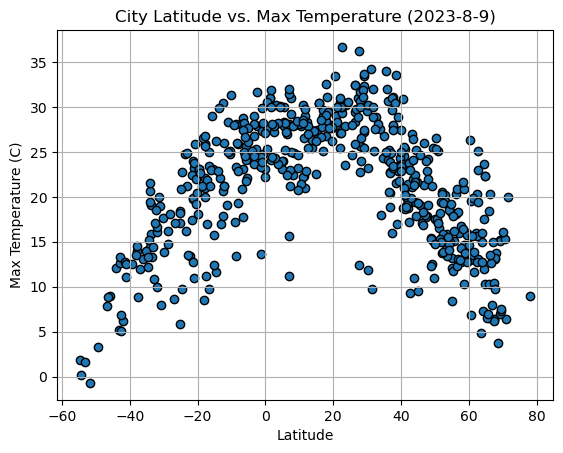

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
    
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

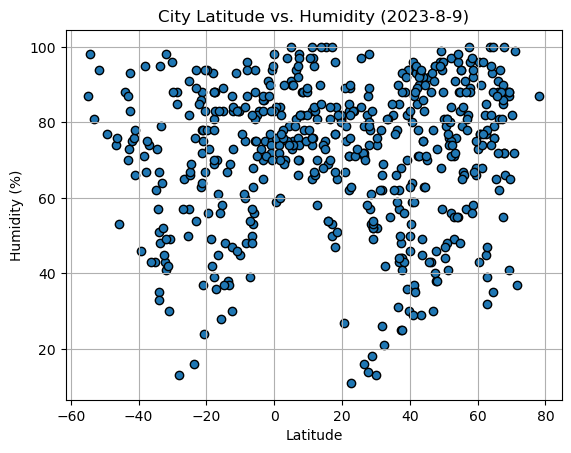

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

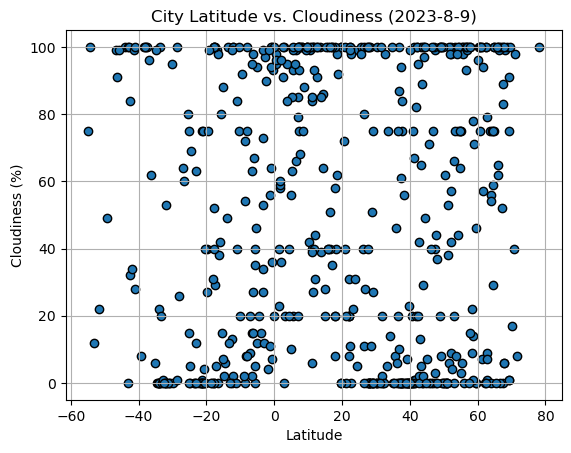

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

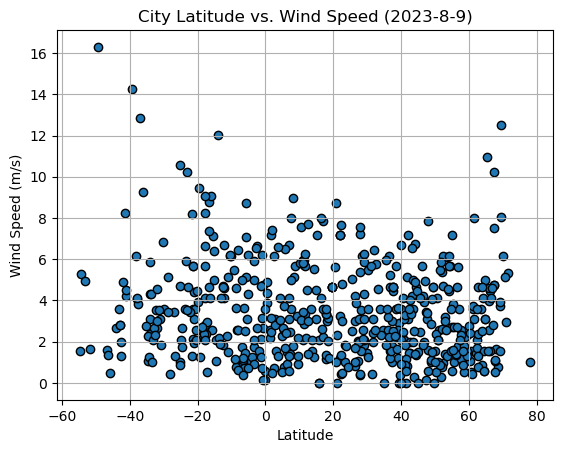

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolors="black",)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-8-9)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,13.78,66,99,1.64,RU,1691720494
2,ust-nera,64.5667,143.2000,23.65,35,59,0.56,RU,1691720494
3,ribeira grande,38.5167,-28.7000,21.54,88,0,3.58,PT,1691720495
6,kuacjok,8.3002,27.9903,22.47,88,100,1.79,SS,1691720495
9,takoradi,4.8845,-1.7554,23.14,91,10,2.29,GH,1691720495


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chui,-33.6971,-53.4616,15.84,95,100,2.40,UY,1691720494
4,atafu village,-8.5421,-172.5159,28.13,75,72,4.61,TK,1691720495
5,tolanaro,-25.0319,46.9987,17.04,82,75,1.03,MG,1691720495
7,grytviken,-54.2811,-36.5092,0.14,98,100,5.28,GS,1691720495
8,puerto natales,-51.7236,-72.4875,-0.71,94,22,1.63,CL,1691720495


In [31]:
# Define a function to create Linear Regression plots
nh_temp_slope, nh_temp_int, nh_temp_r, nh_temp_p, nh_temp_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
nh_temp_fit = nh_temp_slope * northern_hemi_df["Lat"] + nh_temp_int

sh_temp_slope, sh_temp_int, sh_temp_r, sh_temp_p, sh_temp_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
sh_temp_fit = sh_temp_slope * southern_hemi_df["Lat"] + sh_temp_int

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7256846044326069


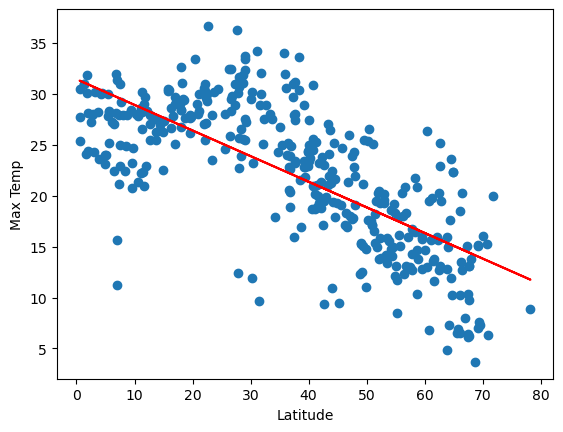

In [32]:
# Linear regression on Northern Hemisphere
nh_temp_eq = "y = " + str(round(nh_temp_slope, 2)) + "x + " + str(round(nh_temp_int, 2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], nh_temp_fit, color="red")
plt.annotate(nh_temp_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {nh_temp_r}")
plt.show()

The r-value is: 0.7861171064235757


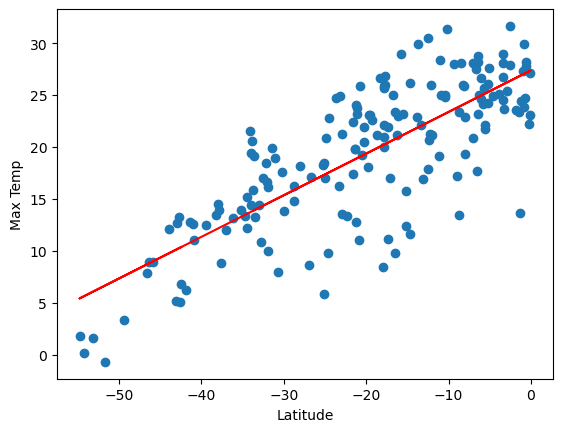

In [33]:
# Linear regression on Southern Hemisphere
sh_temp_eq = "y = " + str(round(sh_temp_slope, 2)) + "x + " + str(round(sh_temp_int, 2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], sh_temp_fit, color="red")
plt.annotate(sh_temp_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {sh_temp_r}")
plt.show()

**Discussion about the linear relationship:** The r-values are pretty high. There seems to be a correlation between Temperature and Latitude.

### Humidity vs. Latitude Linear Regression Plot

In [34]:
# Define a function to create Linear Regression plots
nh_humidity_slope, nh_humidity_int, nh_humidity_r, nh_humidity_p, nh_humidity_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
nh_humidity_fit = nh_humidity_slope * northern_hemi_df["Lat"] + nh_humidity_int

sh_humidity_slope, sh_humidity_int, sh_humidity_r, sh_humidity_p, sh_humidity_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
sh_humidity_fit = sh_humidity_slope * southern_hemi_df["Lat"] + sh_humidity_int

The r-value is: -0.021516355499428184


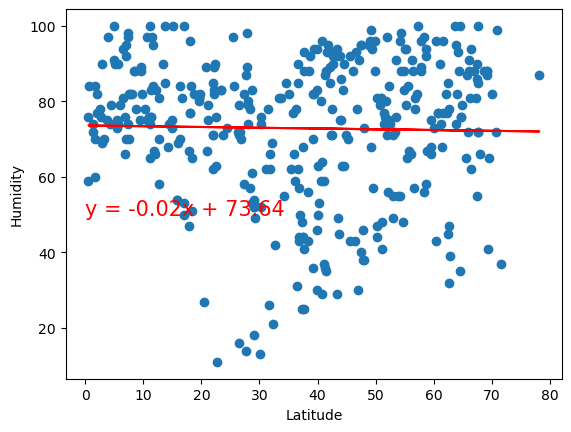

In [35]:
# Northern Hemisphere
nh_humidity_eq = "y = " + str(round(nh_humidity_slope, 2)) + "x + " + str(round(nh_humidity_int, 2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], nh_humidity_fit, color="red")
plt.annotate(nh_humidity_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {nh_humidity_r}")
plt.show()

The r-value is: 0.07443002079950162


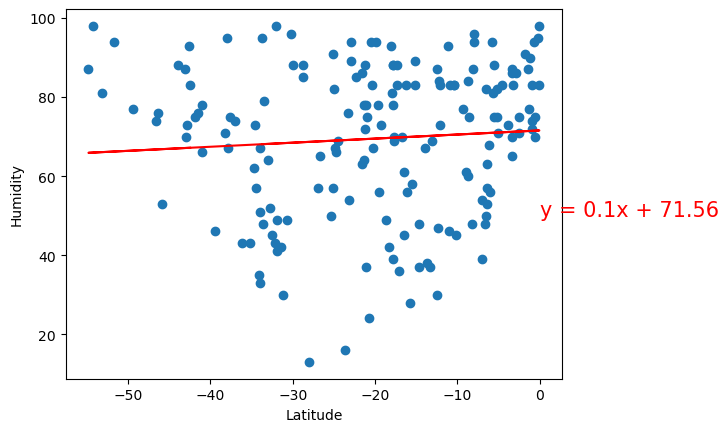

In [36]:
# Southern Hemisphere
sh_humidity_eq = "y = " + str(round(sh_humidity_slope, 2)) + "x + " + str(round(sh_humidity_int, 2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], sh_humidity_fit, color="red")
plt.annotate(sh_humidity_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {sh_humidity_r}")
plt.show()

**Discussion about the linear relationship:** The r-values are really low. There seems to be no correlation between Humidity and Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

In [37]:
# Define a function to create Linear Regression plots
nh_cloudiness_slope, nh_cloudiness_int, nh_cloudiness_r, nh_cloudiness_p, nh_cloudiness_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
nh_cloudiness_fit = nh_cloudiness_slope * northern_hemi_df["Lat"] + nh_cloudiness_int

sh_cloudiness_slope, sh_cloudiness_int, sh_cloudiness_r, sh_cloudiness_p, sh_cloudiness_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
sh_cloudiness_fit = sh_cloudiness_slope * southern_hemi_df["Lat"] + sh_cloudiness_int

The r-value is: -0.0917572179500634


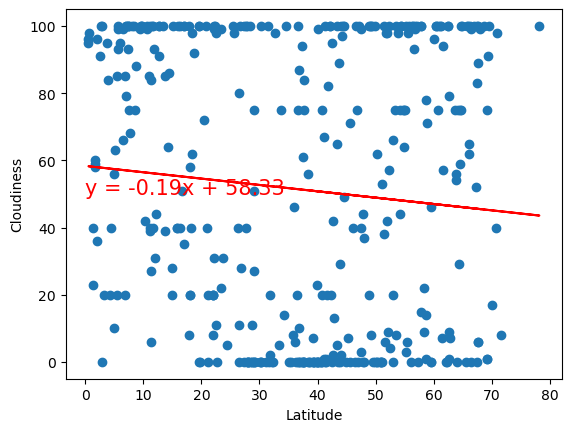

In [38]:
# Northern Hemisphere
nh_cloudiness_eq = "y = " + str(round(nh_cloudiness_slope, 2)) + "x + " + str(round(nh_cloudiness_int, 2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], nh_cloudiness_fit, color="red")
plt.annotate(nh_cloudiness_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {nh_cloudiness_r}")
plt.show()

The r-value is: -0.015099424150165604


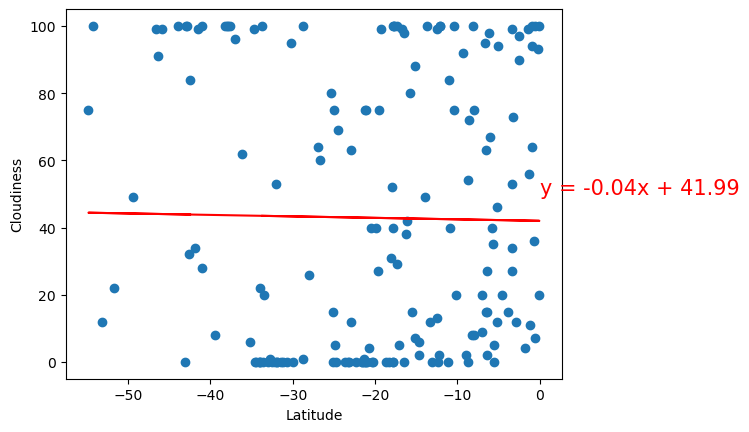

In [39]:
# Southern Hemisphere
sh_cloudiness_eq = "y = " + str(round(sh_cloudiness_slope, 2)) + "x + " + str(round(sh_cloudiness_int, 2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], sh_cloudiness_fit, color="red")
plt.annotate(sh_cloudiness_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {sh_cloudiness_r}")
plt.show()

**Discussion about the linear relationship:** The r-values are pretty low. There seems to be no correlation between Cloudiness and Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

In [40]:
# Define a function to create Linear Regression plots
nh_wind_slope, nh_wind_int, nh_wind_r, nh_wind_p, nh_wind_std_err = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
nh_wind_fit = nh_wind_slope * northern_hemi_df["Lat"] + nh_wind_int

sh_wind_slope, sh_wind_int, sh_wind_r, sh_wind_p, sh_wind_std_err = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
sh_wind_fit = sh_wind_slope * southern_hemi_df["Lat"] + sh_wind_int

The r-value is: -0.07020250502977998


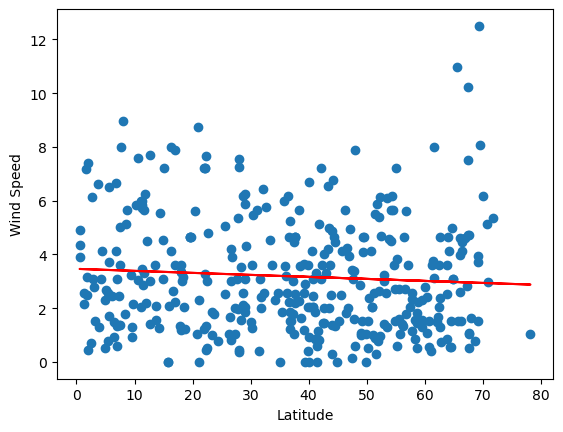

In [41]:
# Northern Hemisphere
nh_wind_eq = "y = " + str(round(nh_wind_slope, 2)) + "x + " + str(round(nh_wind_int, 2))

plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], nh_wind_fit, color="red")
plt.annotate(nh_wind_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {nh_wind_r}")
plt.show()

The r-value is: -0.11724634566022923


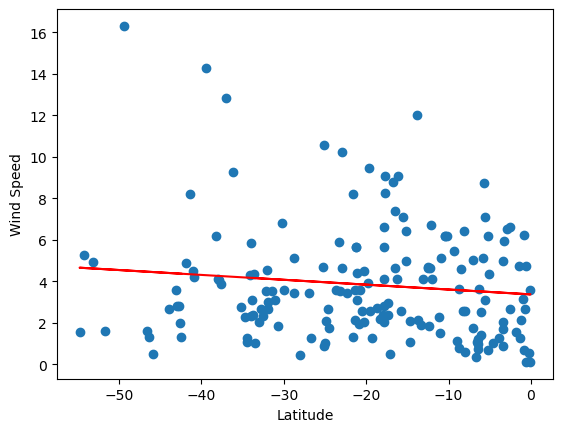

In [42]:
# Southern Hemisphere
sh_wind_eq = "y = " + str(round(sh_wind_slope, 2)) + "x + " + str(round(sh_wind_int, 2))

plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], sh_wind_fit, color="red")
plt.annotate(sh_wind_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {sh_wind_r}")
plt.show()

**Discussion about the linear relationship:** The r-values are pretty low. There seems to be no correlation between Wind Speed and Latitude.